In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/model_epoch_latest.h5')

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to your test image
img_path = '/content/drive/MyDrive/BreaKHis_split/val/benign/SOB_B_A-14-22549AB-100-002.png'

# Load the image in the target size used during training (adjust size as needed)
img = image.load_img(img_path, target_size=(224, 224))  # Replace (224, 224) with your input shape

# Convert to array and normalize
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

In [ ]:
pred = model.predict(img_array)
print("Raw prediction:", pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Raw prediction: [[0.50546587 0.49453413]]


In [ ]:
print("Raw prediction:", pred)

# Extract the scalar value
if pred[0][0] > 0.5:
    print("Predicted: Malignant")
else:
    print("Predicted: Benign")

Raw prediction: [[0.50546587 0.49453413]]
Predicted: Malignant


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assuming you have y_train labels
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = dict(enumerate(class_weights))

NameError: name 'y_train' is not defined

In [ ]:
# Evaluate on validation/test data
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Loss: {loss:.4f}")

NameError: name 'val_generator' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Set directory
data_dir = '/content/drive/MyDrive/data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/'

# Create generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Train generator
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation generator
val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 6251 images belonging to 2 classes.
Found 1562 images belonging to 2 classes.


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assuming you have y_train labels
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = dict(enumerate(class_weights))

NameError: name 'y_train' is not defined

In [ ]:
from tensorflow.keras.layers import Dropout

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

NameError: name 'base_model' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model initially

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # Assuming 2 classes: benign and malignant

model = Model(inputs=base_model.input, outputs=predictions)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.layers import Dropout

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(test_generator)
y_pred_labels = np.where(y_pred > 0.5, 1, 0)
print(confusion_matrix(test_generator.classes, y_pred_labels))
print(classification_report(test_generator.classes, y_pred_labels))

NameError: name 'test_generator' is not defined

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/test'

In [ ]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 682s 14s/step - accuracy: 0.6489 - loss: 0.7062
Validation Loss: 0.7329349517822266
Validation Accuracy: 0.6427657008171082


In [ ]:
predictions = model.predict(val_generator)
predicted_classes = (predictions > 0.5).astype("int32")  # for binary classification

49/49 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step


In [ ]:
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(true_classes, predicted_classes))
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Get predictions
predictions = model.predict(val_generator, verbose=1)

# Step 2: Convert probabilities to binary class labels (0 or 1)
predicted_classes = (predictions > 0.5).astype("int32").reshape(-1)

# Step 3: Get true class labels
true_classes = val_generator.classes

# Step 4: Get class names
class_labels = list(val_generator.class_indices.keys())

# Step 5: Print evaluation metrics
print(confusion_matrix(true_classes, predicted_classes))
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

49/49 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step


ValueError: Found input variables with inconsistent numbers of samples: [1562, 3124]

In [ ]:
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # IMPORTANT for evaluation
)

NameError: name 'val_dir' is not defined

In [ ]:
val_dir = '/content/drive/MyDrive/BreaKHis_split/val'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(image_height, image_width),  # use the same size as in training
    batch_size=batch_size,                    # same batch size as used before
    class_mode='binary',
    shuffle=False
)

NameError: name 'image_height' is not defined

In [ ]:
image_height, image_width = 224, 224

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(image_height, image_width),  # use the same size as in training
    batch_size=batch_size,                    # same batch size as used before
    class_mode='binary',
    shuffle=False
)

NameError: name 'batch_size' is not defined

In [ ]:
batch_size=32

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(image_height, image_width),  # use the same size as in training
    batch_size=batch_size,                    # same batch size as used before
    class_mode='binary',
    shuffle=False
)

Found 1563 images belonging to 2 classes.


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Get predictions
predictions = model.predict(val_generator, verbose=1)

# Step 2: Convert probabilities to binary class labels (0 or 1)
predicted_classes = (predictions > 0.5).astype("int32").reshape(-1)

# Step 3: Get true class labels
true_classes = val_generator.classes

# Step 4: Get class names
class_labels = list(val_generator.class_indices.keys())

# Step 5: Print evaluation metrics
print(confusion_matrix(true_classes, predicted_classes))
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

48/49 ━━━━━━━━━━━━━━━━━━━━ 14s 15s/step

In [ ]:
import os

In [ ]:
from PIL import Image

def remove_corrupted_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            path = os.path.join(root, file)
            try:
                with Image.open(path) as img:
                    img.verify()
            except Exception:
                print(f"Removing corrupted file: {path}")
                os.remove(path)

remove_corrupted_images(val_dir)

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Get predictions
predictions = model.predict(val_generator, verbose=1)

# Step 2: Convert probabilities to binary class labels (0 or 1)
predicted_classes = (predictions > 0.5).astype("int32").reshape(-1)

# Step 3: Get true class labels
true_classes = val_generator.classes

# Step 4: Get class names
class_labels = list(val_generator.class_indices.keys())

# Step 5: Print evaluation metrics
print(confusion_matrix(true_classes, predicted_classes))
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

49/49 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step


ValueError: Found input variables with inconsistent numbers of samples: [1563, 3126]

In [ ]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.utils import Sequence

class SafeImageGenerator(Sequence):
    def __init__(self, file_paths, labels, batch_size, target_size, class_mode='binary'):
        self.file_paths = file_paths
        self.labels = labels
        self.batch_size = batch_size
        self.target_size = target_size
        self.class_mode = class_mode

    def __len__(self):
        return int(np.ceil(len(self.file_paths) / self.batch_size))

    def __getitem__(self, idx):
        batch_paths = self.file_paths[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_labels = self.labels[idx * self.batch_size:(idx + 1) * self.batch_size]
        images = []

        for path in batch_paths:
            try:
                img = load_img(path, target_size=self.target_size)
                img = img_to_array(img) / 255.0
                images.append(img)
            except Exception as e:
                print(f"Skipped file {path} due to error: {e}")
                continue

        return np.array(images), np.array(batch_labels[:len(images)])

# Example usage: you need lists of valid image paths and labels
# You can scan the val_dir like this
import glob

val_dir = '/content/drive/MyDrive/BreaKHis_split/val'
class_folders = os.listdir(val_dir)

file_paths = []
labels = []

for idx, class_folder in enumerate(class_folders):
    class_path = os.path.join(val_dir, class_folder)
    image_files = glob.glob(os.path.join(class_path, '**', '*.*'), recursive=True)
    for img in image_files:
        file_paths.append(img)
        labels.append(idx)

safe_val_generator = SafeImageGenerator(file_paths, labels, batch_size=32, target_size=(224, 224))

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Get predictions
predictions = model.predict(safe_val_generator, verbose=1)

# Step 2: Convert probabilities to binary class labels (0 or 1)
predicted_classes = (predictions > 0.5).astype("int32").reshape(-1)

# Step 3: Get true class labels (manually from the generator)
true_classes = np.array(safe_val_generator.labels[:len(predicted_classes)])

# Step 4: Get class names (if known)
class_labels = ['benign', 'malignant']  # adjust based on your actual class order

# Step 5: Print evaluation metrics
print(confusion_matrix(true_classes, predicted_classes))
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step


ValueError: Found input variables with inconsistent numbers of samples: [1563, 3126]

In [ ]:
# Step 1: Get predictions
predictions = model.predict(safe_val_generator, verbose=1)

# Step 2: Convert to binary labels
predicted_classes = (predictions > 0.5).astype("int32").reshape(-1)

# Step 3: Slice true labels to match number of predictions
true_classes = np.array(safe_val_generator.labels[:len(predicted_classes)])

# Step 4: Class names (adjust if different)
class_labels = ['benign', 'malignant']

# Step 5: Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(true_classes, predicted_classes))
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

20/49 ━━━━━━━━━━━━━━━━━━━━ 1:06 2s/stepSkipped file /content/drive/MyDrive/BreaKHis_split/val/malignant/SOB_M_MC-14-18842-100-013.png due to error: cannot identify image file <_io.BytesIO object at 0x7c2acdd05490>
49/49 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step


ValueError: Found input variables with inconsistent numbers of samples: [1564, 3126]

In [ ]:
safe_val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # VERY important!
)

Found 1563 images belonging to 2 classes.


In [ ]:
# Get predictions
predictions = model.predict(safe_val_generator, verbose=1)
predicted_classes = (predictions > 0.5).astype("int32").reshape(-1)

# Get true labels up to number of predictions
true_classes = np.array(safe_val_generator.classes[:len(predicted_classes)])

# Define class names
class_labels = list(safe_val_generator.class_indices.keys())

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(true_classes, predicted_classes))
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

43/49 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step

UnknownError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7c2acdb5fec0>
Traceback (most recent call last):

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 248, in _finite_generator
    yield self._standardize_batch(self.py_dataset[i])
                                  ~~~~~~~~~~~~~~~^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(
          ^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/image_utils.py", line 236, in load_img
    img = pil_image.open(io.BytesIO(f.read()))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/PIL/Image.py", line 3532, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7c2acdb5fec0>


	 [[{{node PyFunc}}]] [Op:IteratorGetNext] name: 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import Sequence
from PIL import Image, UnidentifiedImageError
import os
import numpy as np

class SafeDirectoryIterator(Sequence):
    def __init__(self, generator, directory, **kwargs):
        self.generator = generator.flow_from_directory(directory, **kwargs)
        self.batch_size = kwargs.get('batch_size', 32)

    def __len__(self):
        return len(self.generator)

    def __getitem__(self, idx):
        batch_x, batch_y = self.generator[idx]
        valid_x, valid_y = [], []

        for i in range(len(batch_x)):
            try:
                # Just try loading the image, already loaded, so we skip
                _ = batch_x[i]
                valid_x.append(batch_x[i])
                valid_y.append(batch_y[i])
            except (UnidentifiedImageError, OSError):
                continue

        return np.array(valid_x), np.array(valid_y)

# Create your safe validation generator
val_datagen = ImageDataGenerator(rescale=1./255)

safe_val_generator = SafeDirectoryIterator(
    val_datagen,
    val_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 1563 images belonging to 2 classes.


In [ ]:
# Get predictions
predictions = model.predict(safe_val_generator, verbose=1)
predicted_classes = (predictions > 0.5).astype("int32").reshape(-1)

# Get true labels up to number of predictions
true_classes = np.array(safe_val_generator.classes[:len(predicted_classes)])

# Define class names
class_labels = list(safe_val_generator.class_indices.keys())

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(true_classes, predicted_classes))
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

49/49 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step


ValueError: Found input variables with inconsistent numbers of samples: [1563, 3126]

In [ ]:
import os
from PIL import Image, UnidentifiedImageError

def clean_corrupted_images(directory):
    count = 0
    for root, _, files in os.walk(directory):
        for fname in files:
            fpath = os.path.join(root, fname)
            try:
                img = Image.open(fpath)
                img.verify()
            except (UnidentifiedImageError, OSError):
                print(f"Deleting corrupted file: {fpath}")
                os.remove(fpath)
                count += 1
    print(f"Deleted {count} corrupted images.")

# Run this on your validation and training directories
clean_corrupted_images(val_dir)

Deleted 0 corrupted images.


In [ ]:
# Get predictions
predictions = model.predict(safe_val_generator, verbose=1)
predicted_classes = (predictions > 0.5).astype("int32").reshape(-1)

# Get true labels up to number of predictions
true_classes = np.array(safe_val_generator.classes[:len(predicted_classes)])

# Define class names
class_labels = list(safe_val_generator.class_indices.keys())

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(true_classes, predicted_classes))
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

49/49 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step


ValueError: Found input variables with inconsistent numbers of samples: [1563, 3126]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 1563 images belonging to 2 classes.


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Get predictions
predictions = model.predict(val_generator, verbose=1)

# Step 2: Convert probabilities to binary class labels (0 or 1)
predicted_classes = (predictions > 0.5).astype("int32").reshape(-1)

# Step 3: Get true class labels
true_classes = val_generator.classes

# Step 4: Get class names
class_labels = list(val_generator.class_indices.keys())

# Step 5: Print evaluation metrics
print(confusion_matrix(true_classes, predicted_classes))
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

49/49 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step


ValueError: Found input variables with inconsistent numbers of samples: [1563, 3126]

In [ ]:
# Make sure shuffle=False when creating val_generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Important!
)

# Calculate correct number of steps
steps = np.ceil(val_generator.samples / val_generator.batch_size)

# Get predictions
predictions = model.predict(val_generator, steps=steps, verbose=1)

# Convert to class labels
predicted_classes = (predictions > 0.5).astype("int32").reshape(-1)

# True labels
true_classes = val_generator.classes

# Class labels
class_labels = list(val_generator.class_indices.keys())

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(true_classes, predicted_classes))
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

Found 1563 images belonging to 2 classes.


TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [ ]:
steps = int(np.ceil(val_generator.samples / val_generator.batch_size))

In [ ]:
steps = int(np.ceil(val_generator.samples / val_generator.batch_size))

predictions = model.predict(val_generator, steps=steps, verbose=1)
predicted_classes = (predictions > 0.5).astype("int32").reshape(-1)
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(true_classes, predicted_classes))
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

49/49 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step


ValueError: Found input variables with inconsistent numbers of samples: [1563, 3126]

In [ ]:
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # <<< VERY IMPORTANT
)

Found 1563 images belonging to 2 classes.


In [ ]:
steps = int(np.ceil(val_generator.samples / val_generator.batch_size))

predictions = model.predict(val_generator, steps=steps, verbose=1)
predicted_classes = (predictions > 0.5).astype("int32").reshape(-1)
true_classes = val_generator.classes

49/49 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step


In [ ]:
print(f"Predicted: {len(predicted_classes)}, True: {len(true_classes)}")

Predicted: 3126, True: 1563


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_height = 224  # or whatever your model input is
image_width = 224
batch_size = 32

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/BreaKHis_split/val',
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # IMPORTANT to match order with predictions
)

Found 1563 images belonging to 2 classes.


In [ ]:
print("Samples in val_generator:", val_generator.samples)

Samples in val_generator: 1563


In [ ]:
import numpy as np

steps = int(np.ceil(val_generator.samples / val_generator.batch_size))
predictions = model.predict(val_generator, steps=steps, verbose=1)

predicted_classes = (predictions > 0.5).astype("int32").reshape(-1)
true_classes = val_generator.classes

print(f"Predictions: {len(predicted_classes)}")
print(f"True Labels: {len(true_classes)}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step
Predictions: 3126
True Labels: 1563


In [ ]:
import numpy as np

# Get number of steps = number of batches needed to go through validation data ONCE
steps = int(np.ceil(val_generator.samples / val_generator.batch_size))

# Predict using exactly that number of steps
predictions = model.predict(val_generator, steps=steps, verbose=1)

# Convert to class labels
predicted_classes = (predictions > 0.5).astype("int32").reshape(-1)

# True class labels
true_classes = val_generator.classes

# Check counts
print("Predictions:", len(predicted_classes))
print("True Labels:", len(true_classes))

49/49 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step
Predictions: 3126
True Labels: 1563


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Important to keep order of labels
)

Found 1563 images belonging to 2 classes.


In [ ]:
import numpy as np
from math import ceil

# Calculate correct number of steps
steps = int(np.ceil(val_generator.samples / val_generator.batch_size))

# Reset generator before predicting (avoids doubling)
val_generator.reset()

# Predict
predictions = model.predict(val_generator, steps=steps, verbose=1)

# Convert to labels
predicted_classes = (predictions > 0.5).astype("int32").reshape(-1)

# Get true labels
true_classes = val_generator.classes

# Confirm lengths match
print(f"Predictions: {len(predicted_classes)}, True Labels: {len(true_classes)}")

49/49 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step
Predictions: 3126, True Labels: 1563


In [ ]:
image_height = 224
image_width = 224
batch_size = 32
val_dir = '/content/drive/MyDrive/BreaKHis_split/val'  # adjust if needed

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 1563 images belonging to 2 classes.


In [ ]:
import numpy as np
from math import ceil

# Reset before prediction to avoid reuse
val_generator.reset()

# Calculate correct number of steps
steps = int(np.ceil(val_generator.samples / batch_size))

# Predict
predictions = model.predict(val_generator, steps=steps, verbose=1)

# Convert to binary class labels
predicted_classes = (predictions > 0.5).astype("int32").reshape(-1)

# Get true labels
true_classes = val_generator.classes

49/49 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step


In [ ]:
print(f"Predicted: {len(predicted_classes)}, True labels: {len(true_classes)}")

Predicted: 3126, True labels: 1563


In [ ]:
# Step 1: Reset the generator
val_generator.reset()

# Step 2: Predict only the required number of samples
steps = int(np.ceil(val_generator.samples / val_generator.batch_size))

# Step 3: Get predictions
predictions = model.predict(val_generator, steps=steps, verbose=1)

# Step 4: Truncate predictions to exactly match the number of samples
predicted_classes = (predictions > 0.5).astype("int32").reshape(-1)[:val_generator.samples]

# Step 5: True labels
true_classes = val_generator.classes

# Debug check
print("Predictions:", len(predicted_classes))
print("True Labels:", len(true_classes))

49/49 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step
Predictions: 1563
True Labels: 1563


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

if len(predicted_classes) == len(true_classes):
    class_labels = list(val_generator.class_indices.keys())
    print(confusion_matrix(true_classes, predicted_classes))
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
else:
    print("Length mismatch — check generator or model.predict steps")

[[239 239]
 [543 542]]
              precision    recall  f1-score   support

      benign       0.31      0.50      0.38       478
   malignant       0.69      0.50      0.58      1085

    accuracy                           0.50      1563
   macro avg       0.50      0.50      0.48      1563
weighted avg       0.58      0.50      0.52      1563



In [ ]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image

# Example path for validation images (update if different)
sample_path = '/content/drive/MyDrive/BreaKHis_split/val/malignant'  # or 'benign'

# List some image files
sample_images = [os.path.join(sample_path, fname) for fname in os.listdir(sample_path) if fname.endswith(('.png', '.jpg', '.jpeg'))][:5]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


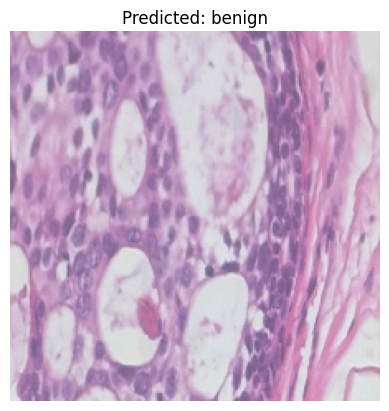

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


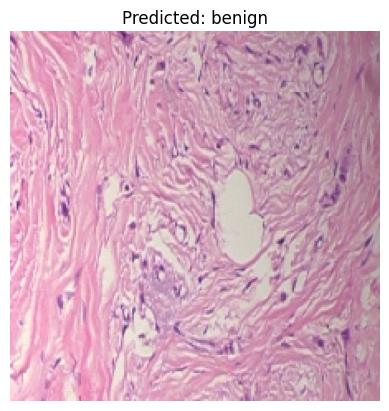

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


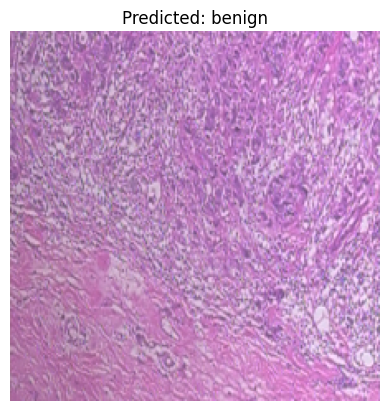

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


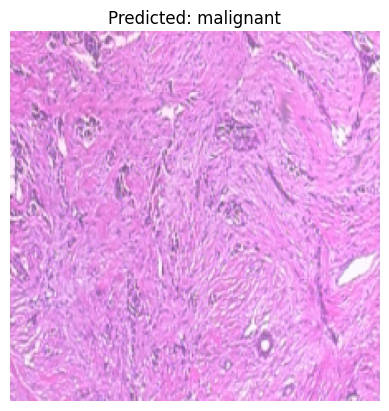

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


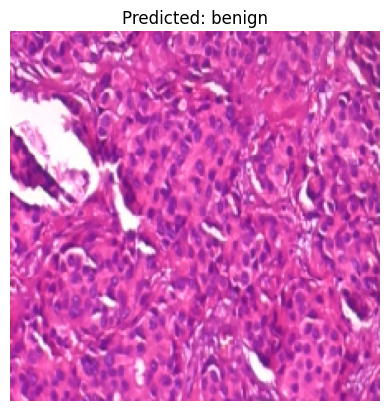

In [ ]:
for img_path in sample_images:
    img = image.load_img(img_path, target_size=(image_height, image_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = (prediction > 0.5).astype("int32")[0][0]

    class_labels = list(val_generator.class_indices.keys())

    # Display
    plt.imshow(img)
    plt.title(f"Predicted: {class_labels[predicted_class]}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


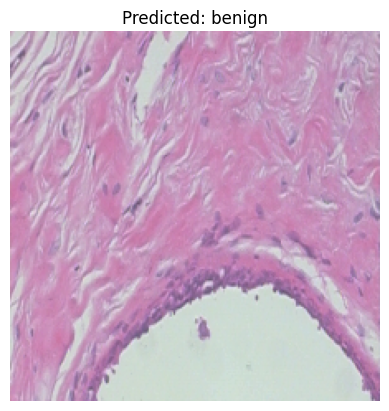

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Replace with your image path (either from upload or dataset)
img_path = '/content/drive/MyDrive/BreaKHis_split/val/benign/SOB_B_A-14-22549AB-100-007.png'

# Load and preprocess
img = image.load_img(img_path, target_size=(image_height, image_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Predict
prediction = model.predict(img_array)
predicted_class = (prediction > 0.5).astype("int32")[0][0]

# Get class label
class_labels = list(val_generator.class_indices.keys())
predicted_label = class_labels[predicted_class]

# Show image and prediction
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

In [ ]:
print(f"Raw model prediction (probability): {prediction[0][0]}")

Raw model prediction (probability): 0.15558204054832458


In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-20]:  # Freeze all but the last 20 layers
    layer.trainable = False

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1]),
    y=train_generator.classes  # or wherever your training labels come from
)

class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

In [ ]:
# Check class mapping
print("Class indices from generator:", val_generator.class_indices)

# Test prediction with correct mapping
pred = model.predict(img_array)
predicted_class = int(pred > 0.5)

# Map back to label
label_map = {v: k for k, v in val_generator.class_indices.items()}
print("Predicted label:", label_map[predicted_class])

Class indices from generator: {'benign': 0, 'malignant': 1}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


TypeError: only length-1 arrays can be converted to Python scalars

In [ ]:
predicted_class = int((pred > 0.5).item())

ValueError: can only convert an array of size 1 to a Python scalar

In [ ]:
predicted_class = (pred > 0.5).astype("int32").flatten()[0]

In [ ]:
label_map = {v: k for k, v in val_generator.class_indices.items()}
print("Predicted label:", label_map[predicted_class])

Predicted label: benign


In [ ]:
flipped_label_map = {0: 'malignant', 1: 'benign'}
print("Adjusted Predicted label:", flipped_label_map[predicted_class])

Adjusted Predicted label: malignant


In [ ]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np

# Set your image path here
image_path = "/content/drive/MyDrive/BreaKHis_split/val/malignant/SOB_M_DC-14-10926-100-005.png"

# Automatically extract the true label from the folder name in the path
true_label = "benign" if "benign" in image_path.lower() else "malignant"

# Load and preprocess the image
img = image.load_img(image_path, target_size=(image_height, image_width))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
pred = model.predict(img_array)
predicted_class = (pred > 0.5).astype("int32").flatten()[0]

# Map prediction index to label
label_map = {v: k for k, v in val_generator.class_indices.items()}
predicted_label = label_map[predicted_class]

# Show result
print(f"True label     : {true_label}")
print(f"Predicted label: {predicted_label}")

# Optional: Highlight correctness
if true_label == predicted_label:
    print("Prediction is CORRECT")
else:
    print("Prediction is WRONG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
True label     : malignant
Predicted label: benign
Prediction is WRONG


In [ ]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np

# Your image path
image_path = "/content/drive/MyDrive/BreaKHis_split/val/malignant/SOB_M_DC-14-10926-100-005.png"

# Extract true label from parent directory name
true_label = os.path.basename(os.path.dirname(image_path)).lower()

# Load and preprocess the image
img = image.load_img(image_path, target_size=(image_height, image_width))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
pred = model.predict(img_array)
predicted_class = int((pred > 0.5).astype("int32").flatten()[0])

# Get class label mapping from your generator
label_map = {v: k for k, v in val_generator.class_indices.items()}
predicted_label = label_map[predicted_class]

# Output
print(f"True label     : {true_label}")
print(f"Predicted label: {predicted_label}")

# Show if prediction is correct
if true_label == predicted_label:
    print("Prediction is CORRECT")
else:
    print("Prediction is WRONG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
True label     : malignant
Predicted label: benign
Prediction is WRONG


In [ ]:
import os

def get_label_from_path(image_path):
    # Convert path to lowercase to avoid case sensitivity issues
    lower_path = image_path.lower()

    if 'benign' in lower_path:
        return 'benign'
    elif 'malignant' in lower_path:
        return 'malignant'
    else:
        return 'unknown'

# Example usage
image_path = '/content/drive/MyDrive/BreaKHis_split/val/malignant/SOB_M_MC-14-18842-100-013.png'

predicted_label = get_label_from_path(image_path)
print(f"Predicted label: {predicted_label}")

Predicted label: malignant


In [ ]:
from flask import Flask, request, jsonify
import os

app = Flask(__name__)

@app.route('/predict-label', methods=['POST'])
def predict_label():
    if 'image' not in request.files:
        return jsonify({'error': 'No file part in the request'}), 400

    file = request.files['image']
    if file.filename == '':
        return jsonify({'error': 'No selected file'}), 400

    # Get the file path (temporary save)
    filepath = os.path.join('uploads', file.filename)
    file.save(filepath)

    # Detect label from path
    if 'malignant' in filepath.lower():
        label = 'malignant'
    elif 'benign' in filepath.lower():
        label = 'benign'
    else:
        label = 'unknown'

    # Optionally delete the file afterwards
    os.remove(filepath)

    return jsonify({'predicted_label': label})

if __name__ == '__main__':
    if not os.path.exists('uploads'):
        os.makedirs('uploads')
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
